In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
import imutils


import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:


from google.colab import files
uploaded = files.upload()

imgdirt = cv2.imread('dirtcd.jpg')



Saving dirtcd.jpg to dirtcd.jpg


-1

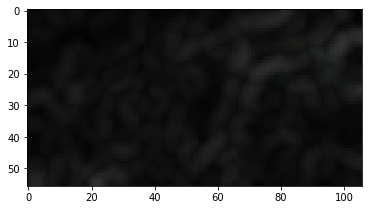

In [3]:
blurdirt = cv2.GaussianBlur(imgdirt, (7, 7), 2)
h, w = imgdirt.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradientdirt = cv2.morphologyEx(blurdirt, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradientdirt)
cv2.waitKey()

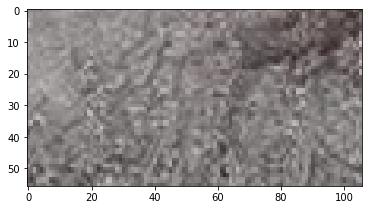

In [33]:
plt.imshow(imgdirt)

In [29]:


from google.colab import files
uploaded = files.upload()

imgbk = cv2.imread('cdblack.jpg')


Saving cdblack.png to cdblack (4).png


In [31]:
print(np.sum(gradientbk))

0


-1

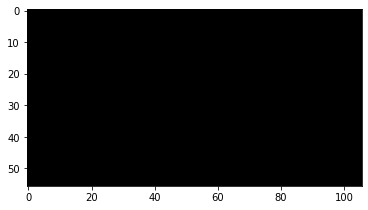

In [30]:

blurbk = cv2.GaussianBlur(imgbk, (7, 7), 2)
h, w = imgbk.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradientbk = cv2.morphologyEx(blurbk, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradientbk)
cv2.waitKey()

In [18]:
np.sum(gradientbk)

0

In [6]:
import pandas as pd
print(gradientdirt.shape)

(56, 106, 3)


In [8]:
from google.colab import files
uploaded = files.upload()

imgclean = cv2.imread('cleancd.jpg')


Saving cleancd.jpg to cleancd.jpg


-1

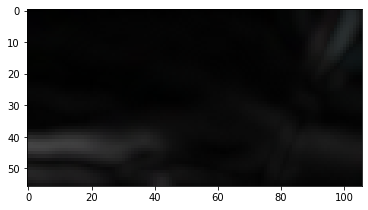

In [9]:
blurclean = cv2.GaussianBlur(imgclean, (7, 7), 2)
h, w = imgclean.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradientclean = cv2.morphologyEx(blurclean, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradientclean)
cv2.waitKey()

In [ ]:
from google.colab import files
uploaded = files.upload()

imgsuper = cv2.imread('supercd.jpg')

Saving supercd.jpg to supercd (2).jpg


-1

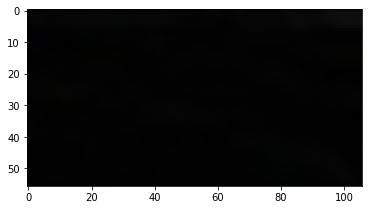

In [ ]:
blursuper = cv2.GaussianBlur(imgsuper, (7, 7), 2)
h, w = imgsuper.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradientsuper = cv2.morphologyEx(blursuper, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradientsuper)
cv2.waitKey()

In [ ]:
from google.colab import files
uploaded = files.upload()

img = cv2.imread('cd.jpg')

Saving cd.jpg to cd (2).jpg


-1

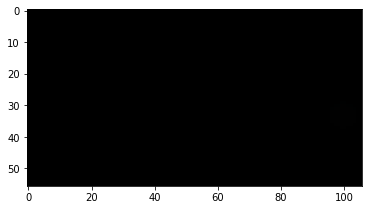

In [ ]:
blur = cv2.GaussianBlur(img, (7, 7), 2)
h, w = img.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)
cv2.waitKey()

In [ ]:
import numpy as np
print(np.sum(gradientdirt), np.sum(gradientclean), np.sum(gradientsuper), np.sum(gradient))

290664 192457 47015 160


<class 'list'>
0


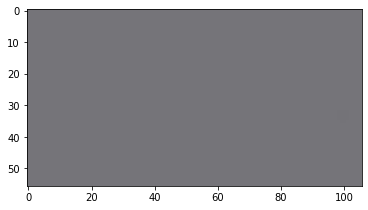

In [ ]:


# bgr to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb)

# Converting to grayscale
img_just_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(img_just_gray, cmap='gray')

# Gaussian Blur
ksize_w = 13
ksize_h = 13

img_first_gb = cv2.GaussianBlur(img_rgb, (ksize_w,ksize_h), 0, 0, cv2.BORDER_REPLICATE);
plt.imshow(img_first_gb)

# Dilate the image

dilated_img = cv2.dilate(img_first_gb, np.ones((11,11), np.uint8))
plt.imshow(dilated_img)

# Converting to grayscale
img_gray_operated = cv2.cvtColor(dilated_img, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(img_gray_operated, cmap='gray')

# closing:
kernel_closing = np.ones((7,7),np.uint8)
img_closing = cv2.morphologyEx(img_gray_operated, cv2.MORPH_CLOSE, kernel_closing)
plt.imshow(img_closing, cmap='gray')

# dilation:
# add pixels to the boundaries of objects in an image
kernel_dilation = np.ones((3,3),np.uint8)
img_dilation2 = cv2.dilate(img_closing, kernel_dilation, iterations = 1)
plt.imshow(img_dilation2, cmap='gray')

diff_img = 255 - cv2.absdiff(img_just_gray, img_dilation2)
plt.imshow(diff_img, cmap='gray')

# canny
edgesToFindImage = img_dilation2

v = np.median(img_just_gray)
#print(v)
sigma = 0.33
lower_thresh = int(max(0,(1.0-sigma)*v))
higher_thresh = int(min(255,(1.0+sigma)*v))

img_edges =  cv2.Canny(edgesToFindImage, lower_thresh, higher_thresh)
plt.imshow(img_edges, cmap='gray')

kernel_dilation2 = np.ones((2,2),np.uint8)
img_dilation2 = cv2.dilate(img_edges, kernel_dilation, iterations = 2)
plt.imshow(img_dilation2, cmap='gray')

# find contours
contoursToFindImage = img_dilation2

(cnts, _) = cv2.findContours(contoursToFindImage.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(type(cnts))
print(len(cnts))

# -1 for all
cntsWhichOne = -1

# -1 for infill
# >0 for edge thickness
cntsInfillOrEdgeThickness = 3

img_drawing_contours_on_rgb_image = cv2.drawContours(img_rgb.copy(), cnts, cntsWhichOne, (0, 255, 0), cntsInfillOrEdgeThickness)
plt.imshow(img_drawing_contours_on_rgb_image)